In [162]:
import pandas as pd


In [164]:
pdf = pd.read_csv('./datasets/AusImmigrationPolicy.csv')
yeardf = pd.read_csv('./datasets/cleaned-migration-years.csv')

In [165]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=yeardf.year,
    y=yeardf.migration_no
))

text = []
for index, row in pdf.iterrows():
    text.append(dict(
            y=607870,
          x=row['Year'],
          text=row['Year'],
          showarrow=False,font_color='#96D38C',
          textangle=-90,hoverlabel_font_color='#96D38C',
          valign="top", font_size=15, hovertext=("{}:{}".format(row['Year'], row['Policy'])),
        ))

fig.update_layout(showlegend=False,     
    height=800,
    title_text='Policy and Migration number (hover mouse over the geen label to see policy details)',
    annotations=text
)
fig.show()

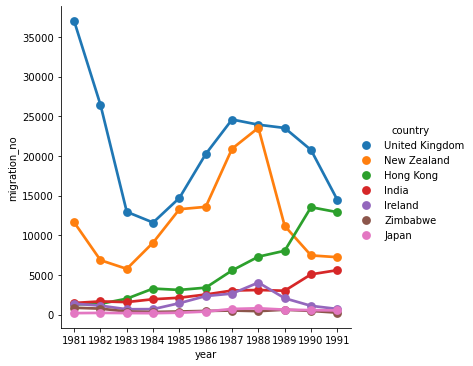

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./datasets/cleaned-migration.csv')


df_limit = df.loc[df['country'].isin(['Zimbabwe','Hong Kong','Japan', 'India', 'China', 'United Kingdom', "Ireland", "New Zealand"])]
year = (df_limit['year'] > 1980) & (df_limit['year'] <= 1991)
df_limit = df_limit.loc[year]


sns.catplot(x="year", y="migration_no", hue="country", kind="point", data=df_limit)
plt.show()

In [167]:
df = pd.read_csv('./datasets/cleaned-migration.csv')
df

,country,year,migration_no,iso_alpha
0,Ireland,1864,121,IRL
1,Ireland,1865,82,IRL
2,Ireland,1866,49,IRL
3,Ireland,1867,25,IRL
4,Ireland,1868,5,IRL
...,...,...,...,...
8100,Colombia,2016,438,COL
8101,Russian Federation,2016,461,RUS
8102,Brazil,2016,574,BRA
8103,France,2016,672,FRA


In [168]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.express as px
gapminder = px.data.gapminder()
px.choropleth(df,               
                    locations="iso_alpha",               
                    color="migration_no",
                    hover_name="country",  
                    animation_frame="year",    
                    color_continuous_scale=px.colors.sequential.tempo,  
                    height=600,
                    labels={'migration_no':'Total Migration'}
)

<AxesSubplot:>

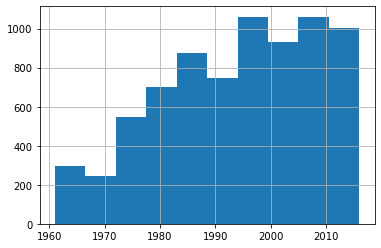

In [169]:
df["year"][df.year > 1960].hist()